# Step 1
Dobbiamo risistemare alcune cose della versione 1.01, in particolare dobbiamo fare dei fit  prima e dopo la selezione del probe, quindi un fit della ricostruzione fatta con $Z_{after}=\mu_{tag}+\mu_{PP}$ (e quindi dopo il taglio) sia un fit di $Z_{before}=\mu_{tag}+\mu_{AP}$, dove utilizzo tutti i probes, passing o meno che siano

In [1]:
import ROOT
import particle as pt
import numpy as np

Welcome to JupyROOT 6.26/04


In [2]:
fileDY = ROOT.TFile("./datas/DYJets.root","OPEN")
dytr = fileDY.trees.events

file = ROOT.TFile("./datas/Data.root","OPEN")
tr = file.trees.events

**⚠** Non mi rifaccio i plot che ci hanno permesso di stabilire i taglio, per quelli consultare la versione 1.01, mi scrivo solo i tagli

| Caratteristica | Criterio stretto | Criterio largo |
| ------ | ----------- ||
| $\chi^2$   | $0.6<\chi^2<1.2$ | $0.2<\chi^2<1.8$ |
| $dz$ | $<0.003$ | $<0.005$ |
| $dB$ | $<0.0015$ | $<0.003$|
| $iso$ | $<2$ | $<4$ | 

Warning in <TFile::Append>: Replacing existing TH1: DY_mu_mass_PP (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: DY_mu_mass_PP (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: DY_allprobes (Potential memory leak).


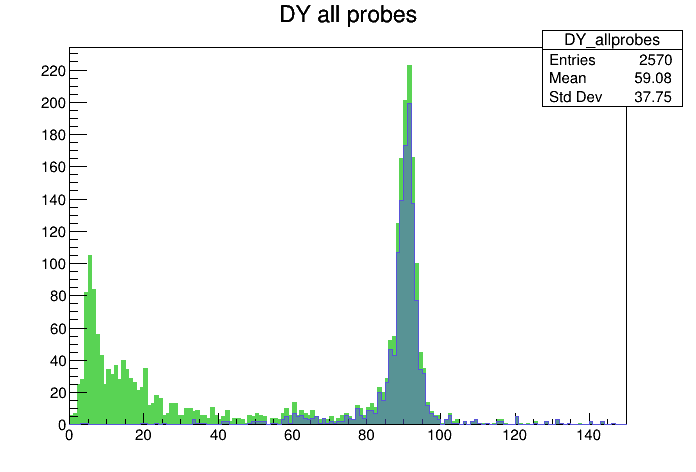

In [47]:
h_passing_probes = ROOT.TH1F("DY_mu_mass_PP","DY Muon mass PP",150,0,150) 
h_failing_probes = ROOT.TH1F("DY_mu_mass_PP","DY Muon mass PP",150,0,150) 
h_all_probes = ROOT.TH1F("DY_allprobes","DY all probes",150,0,150) 
c=ROOT.TCanvas()

n_pass = 0
n_fail = 0

for i in range(dytr.GetEntries()):
    dytr.GetEntry(i)
    if(dytr.muontracks_size>1):
        muons = pt.get_collection(dytr, "muontracks")
        for mi in range(len(muons)):
            if(dytr.muontracks_chi2[mi]<1.2 and dytr.muontracks_chi2[mi]>0.6 and dytr.muontracks_dz[mi]<0.003 and dytr.muontracks_dB[mi]<0.0015 and dytr.muontracks_isoDeposits[mi]<2):
                p4t=muons[mi].p4
                for mj in range(len(muons)):
                    if(mj != mi):
                        p4ap=muons[mj].p4
                        s_all = (p4t+p4ap).M()
                        h_all_probes.Fill(s_all)
                        if(dytr.muontracks_chi2[mj]<1.8 and dytr.muontracks_chi2[mj]>0.2 and dytr.muontracks_dz[mj]<0.005 and dytr.muontracks_dB[mj]<0.003 and dytr.muontracks_isoDeposits[mj]<4):
                            p4pp=muons[mj].p4
                            s_pass = (p4t+p4pp).M()
                            h_passing_probes.Fill(s_pass)
                            #n_pass = n_pass +1
                        else:
                            p4fp=muons[mj].p4
                            s_fail = (p4t+p4fp).M()
                            h_failing_probes.Fill(s_fail)
                            #n_fail = n_fail +1
c.Draw()
h_all_probes.SetLineColor(8)
h_all_probes.SetFillColorAlpha(8,1)
h_all_probes.Draw()
h_passing_probes.SetLineColor(9)
h_passing_probes.SetFillColorAlpha(9,0.5)
h_passing_probes.Draw("SAME")


 FCN=376.536 FROM MIGRAD    STATUS=CONVERGED     311 CALLS         312 TOTAL
                     EDM=1.82928e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           9.07589e+01   7.62038e-02   6.95800e-04  -5.17112e-03
   2  p1           3.01868e+00   9.67806e-02   8.82848e-04   8.79768e-04
   3  p2           1.43389e+03   4.13601e+01   3.92255e-01   6.96009e-06
   4  p3           1.55143e+01   1.00722e+00   8.36138e-03   3.22046e-04
   5  p4           1.14674e+03   4.55775e+01   3.78845e-01   7.08516e-06
 FCN=251.717 FROM MIGRAD    STATUS=CONVERGED     131 CALLS         132 TOTAL
                     EDM=3.68063e-11    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   1.3 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           9

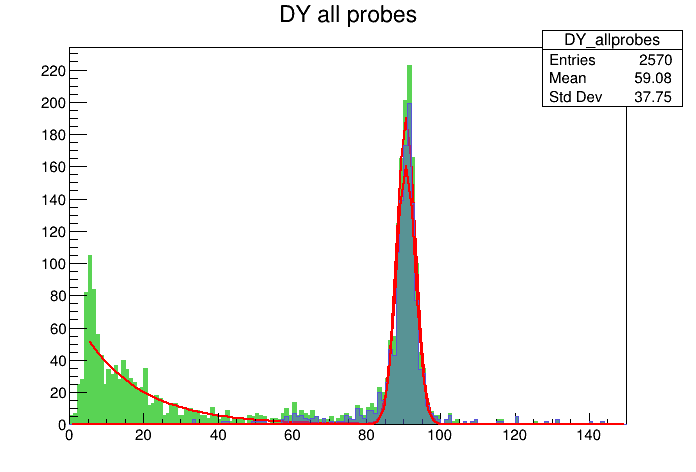

In [48]:
pp = ROOT.TF1("gauss", "[2]*1/([1]*TMath::Sqrt(2*TMath::Pi()))*exp(-((x-[0])*(x-[0]))/(TMath::Sqrt(2)*[1]*[1]))", 40,140)
ap = ROOT.TF1("exp+gauss", "[4]/[3]*TMath::Exp(-x/[3]) + [2]*1/([1]*TMath::Sqrt(2*TMath::Pi()))*exp(-((x-[0])*(x-[0]))/(TMath::Sqrt(2)*[1]*[1]))", 5, 140)

pp.SetParameters(50,10,50)
ap.SetParameters(90,10,10,500,100)

h_all_probes.Fit(ap, "SR")
h_passing_probes.Fit(pp)

c.Draw()

In [51]:
n_ap=ap.Integral(5,140)
n_pp=pp.Integral(40,140)
print(n_ap, n_pp)
epsilon = n_pp/n_ap
print("Efficiency:", epsilon)

2036.4222926337904 1007.3654850958135
Efficiency: 0.49467415905811235
